In [1]:
from bs4 import BeautifulSoup
# Imports
import asyncio
import hashlib
import random
import time
from datetime import date
from urllib.request import Request, urlopen

import pandas as pd
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from requests import Session
from requests.utils import unquote
ua = UserAgent(fallback="chrome")
import re

## Testing "link_extractor"

In [2]:
import pandas as pd
from link_extractor import Google, Bing, Yahoo

### Testing Google class

In [3]:
google = Google(company="UBS")
google_links = google.get_links(max_articles=100)

In [4]:
google_links.head()

,Search Engine,Link,Title,Source
0,Google,https://www.bloomberg.com/news/articles/2023-0...,UBS Chair Colm Kelleher Prepped Credit Suisse ...,Bloomberg.com
1,Google,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,CNBC
2,Google,https://www.bloomberg.com/opinion/articles/202...,Can UBS and Credit Suisse Eventually Beat Riva...,Bloomberg.com
3,Google,https://www.reuters.com/business/finance/ubs-f...,UBS tells investors 'Herculean' Credit Suisse ...,Reuters
4,Google,https://finance.yahoo.com/news/ubs-executives-...,UBS Executives Say Surprise Credit Suisse Acqu...,Yahoo Finance


### Testing Bing class

In [5]:
bing = Bing(company="UBS")
bing_links = bing.get_links(max_articles=100)

In [6]:
bing_links.head()

,Search Engine,Link,Title,Source
0,Bing,https://www.msn.com/en-gb/money/other/ubs-tell...,UBS tells investors 'Herculean' Credit Suisse ...,Reuters on MSN
1,Bing,https://www.msn.com/en-gb/money/topstories/ubs...,UBS tells investors shotgun Credit Suisse take...,Reuters on MSN
2,Bing,https://www.nytimes.com/2023/04/05/business/de...,UBS Chiefs See Risks Ahead in Credit Suisse Ta...,The New York Times
3,Bing,https://www.theguardian.com/business/2023/apr/...,UBS bosses urged to avoid job cuts and hikes i...,The Guardian
4,Bing,https://www.msn.com/en-us/money/markets/histor...,'Historic day': UBS sets out plans in first sh...,CNBC on MSN


### Testing Yahoo class

In [7]:
yahoo = Yahoo(company="UBS")
yahoo_links = yahoo.get_links(max_articles=100)

In [8]:
yahoo_links.head()

,Search Engine,Link,Title,Source
0,Yahoo,https://finance.yahoo.com/news/ubs-chairman-to...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,Bloomberg via Yahoo Finance
1,Yahoo,https://www.nytimes.com/2023/04/05/business/de...,UBS Chiefs See Risks Ahead in Credit Suisse Ta...,New York Times
2,Yahoo,https://www.msn.com/en-in/money/topstories/ubs...,UBS chairman warns of 'execution risks' associ...,MSN News
3,Yahoo,https://www.investing.com/news/stock-market-ne...,UBS Chairman addresses shareholders on milesto...,Investing.com
4,Yahoo,https://news.yahoo.com/ubs-shareholders-weigh-...,UBS says Credit Suisse merger the right choice...,AFP via Yahoo News


## Testing "html_content_extractor2"

### Combine links from Google, Bing, and Yahoo

In [9]:
links = pd.concat([google_links, bing_links, yahoo_links])

In [10]:
links["Search Engine"].value_counts()

Google    100
Bing      100
Yahoo     100
Name: Search Engine, dtype: int64

In [11]:
links["Link"].duplicated().sum()

50

In [12]:
urls = links["Link"].drop_duplicates().to_list()
len(urls)

250

In [13]:
from content_extractor2 import get_content

In [14]:
results = get_content(urls)

Getting news article info: 100%|██████████| 250/250 [11:23<00:00,  2.74s/it]

The following news sources could not be accessed or resulted in an error:
https://www.nytimes.com/2023/04/05/business/dealbook/ubs-investors-credit-suisse.html 

https://www.advisorhub.com/ubs-claws-back-2-6-mln-from-boston-broker-who-jumped-to-janney/ 

https://www.nytimes.com/2023/04/04/business/dealbook/credit-suisse-shareholders.html 

https://www.nytimes.com/2023/03/29/business/dealbook/ubs-credit-suisse-sergio-ermotti.html 

https://www.thestreet.com/investing/ubs-credit-suisse-merger-may-lead-to-massive-layoffs 

https://www.moneyweb.co.za/news/international/ubs-shares-storm-back-to-pre-svb-levels-with-post-deal-surge/ 

https://www.wxii12.com/article/ubs-is-buying-credit-suisse-to-halt-banking-crisis/43358804 

https://www.thestreet.com/banking/ubs-acquires-credit-suisse-for-more-than-3-billion 

https://www.valuepenguin.com/ubs-visa-infinite-credit-card 

https://www.investing.com/news/stock-market-news/ubs-chairman-addresses-shareholders-on-milestone-credit-suisse-takeover-30

In [15]:
results.head(10)

,Link,Title,Body,Author,Published
0,https://www.bloomberg.com/news/articles/2023-0...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,UBS Group AG pulled off one of the biggest ban...,"[Jan-Henrik Foerster, Aaron Kirchfeld, Katheri...",2023-04-04 00:00:00
1,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,In this article CSG.N-CH Follow your favorite ...,[Elliot Smith],2023-04-04 00:00:00
2,https://www.bloomberg.com/opinion/articles/202...,Can UBS and Credit Suisse Become the Winning T...,"This is Bloomberg Opinion Today, a stew of ang...","[Jessica Karl, Follow The Authors]",2023-04-05 00:00:00
3,https://www.reuters.com/business/finance/ubs-f...,UBS tells investors 'Herculean' Credit Suisse ...,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nBASEL, April 5 (Re...",[Noele Illien],2023-04-05 00:00:00
4,https://finance.yahoo.com/news/ubs-executives-...,UBS Executives Say Surprise Credit Suisse Acqu...,When UBS AG (NYSE: UBS) agreed to acquire Cred...,[Vandana Singh],None
5,https://apnews.com/article/credit-suisse-ubs-s...,UBS confident about Credit Suisse deal despite...,"Colm Kelleher, Chairman of the Board of Direct...","[Jamey Keaten, David Mchugh]",2023-04-05 08:04:59+00:00
6,https://www.ft.com/content/74313a98-6a71-4410-...,Subscribe to read,What is included in my trial?\n\nDuring your t...,[],None
7,https://www.theguardian.com/business/2023/apr/...,UBS bosses urged to avoid job cuts and hikes i...,Worried UBS investors have urged the Swiss len...,[Kalyeena Makortoff],2023-04-05 00:00:00
8,https://seekingalpha.com/news/3954726-automake...,Automakers likely driving toward overproductio...,An analysis by UBS indicates that automakers c...,"[Kevin P. Curran, Sa News Editor]",2023-04-05 11:46:25-04:00
9,https://www.cnbc.com/2023/04/05/ubs-says-this-...,UBS says this little-known food packaging stoc...,"Now is the time to buy shares of Sealed Air , ...","[Hakyung Kim, Https, Www.Linkedin.Com In Hakyu...",2023-04-05 00:00:00


## Some NLP Preprocessing

In [16]:
len(results)

231

In [17]:
data = results.loc[results["Body"].str.strip().astype(bool)].reset_index(drop=True)

In [50]:
# Why would you ever make a string column boolean?
x = ""
bool(x)

False

In [18]:
len(data)

195

In [19]:
data.head()

,Link,Title,Body,Author,Published
0,https://www.bloomberg.com/news/articles/2023-0...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,UBS Group AG pulled off one of the biggest ban...,"[Jan-Henrik Foerster, Aaron Kirchfeld, Katheri...",2023-04-04 00:00:00
1,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,In this article CSG.N-CH Follow your favorite ...,[Elliot Smith],2023-04-04 00:00:00
2,https://www.bloomberg.com/opinion/articles/202...,Can UBS and Credit Suisse Become the Winning T...,"This is Bloomberg Opinion Today, a stew of ang...","[Jessica Karl, Follow The Authors]",2023-04-05 00:00:00
3,https://www.reuters.com/business/finance/ubs-f...,UBS tells investors 'Herculean' Credit Suisse ...,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nBASEL, April 5 (Re...",[Noele Illien],2023-04-05 00:00:00
4,https://finance.yahoo.com/news/ubs-executives-...,UBS Executives Say Surprise Credit Suisse Acqu...,When UBS AG (NYSE: UBS) agreed to acquire Cred...,[Vandana Singh],None


In [20]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
# Import the stop word list
from nltk.corpus import stopwords
nltk.download("stopwords")
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Import stemmer.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Average Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).mean()

524.9435897435898

In [22]:
# Total Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).sum()

102364

### Remove Numbers (We are doing reputational NLP so doesnt seem relevant)

In [23]:
def remove_numbers(text):
    no_nums = "".join([i for i in text if not i.isdigit()])
    return no_nums

In [24]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"].head(10)

0    UBS Group AG pulled off one of the biggest ban...
1    In this article CSG.N-CH Follow your favorite ...
2    This is Bloomberg Opinion Today, a stew of ang...
3    \n\n\n\n\n\n\n\n\n\n\n\n\n\nBASEL, April  (Reu...
4    When UBS AG (NYSE: UBS) agreed to acquire Cred...
5    Colm Kelleher, Chairman of the Board of Direct...
6    What is included in my trial?\n\nDuring your t...
7    Worried UBS investors have urged the Swiss len...
8    An analysis by UBS indicates that automakers c...
9    Now is the time to buy shares of Sealed Air , ...
Name: Body, dtype: object

### Removing extra whitespaces / new lines

In [25]:
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)

### Removing Punctuation

In [26]:
def remove_punctuation(text):
    no_punct = "".join ([c for c in text if c not in string.punctuation])
    return no_punct

In [27]:
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"].head(10)

0    UBS Group AG pulled off one of the biggest ban...
1    In this article CSGNCH Follow your favorite st...
2    This is Bloomberg Opinion Today a stew of ange...
3                  BASEL April  Reuters  UBS UBSGS ...
4    When UBS AG NYSE UBS agreed to acquire Credit ...
5    Colm Kelleher Chairman of the Board of Directo...
6    What is included in my trial  During your tria...
7    Worried UBS investors have urged the Swiss len...
8    An analysis by UBS indicates that automakers c...
9    Now is the time to buy shares of Sealed Air  a...
Name: Body, dtype: object

### Tokenization

In [28]:
tokenizer = RegexpTokenizer(r'\w+')

In [29]:
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"].head(10)

0    [ubs, group, ag, pulled, off, one, of, the, bi...
1    [in, this, article, csgnch, follow, your, favo...
2    [this, is, bloomberg, opinion, today, a, stew,...
3    [basel, april, reuters, ubs, ubsgs, executives...
4    [when, ubs, ag, nyse, ubs, agreed, to, acquire...
5    [colm, kelleher, chairman, of, the, board, of,...
6    [what, is, included, in, my, trial, during, yo...
7    [worried, ubs, investors, have, urged, the, sw...
8    [an, analysis, by, ubs, indicates, that, autom...
9    [now, is, the, time, to, buy, shares, of, seal...
Name: Body, dtype: object

### Removing Stopwords

In [30]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [31]:
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"].head(10)

0    [ubs, group, ag, pulled, one, biggest, bank, d...
1    [article, csgnch, follow, favorite, stocks, cr...
2    [bloomberg, opinion, today, stew, anger, resen...
3    [basel, april, reuters, ubs, ubsgs, executives...
4    [ubs, ag, nyse, ubs, agreed, acquire, credit, ...
5    [colm, kelleher, chairman, board, directors, s...
6    [included, trial, trial, complete, digital, ac...
7    [worried, ubs, investors, urged, swiss, lender...
8    [analysis, ubs, indicates, automakers, could, ...
9    [time, buy, shares, sealed, air, according, ub...
Name: Body, dtype: object

### Lemmatization

In [32]:
lemmatizer = WordNetLemmatizer()

In [33]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize (i) for i in text]
    return lem_text

In [34]:
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))
data["Body"].head(10)

0    [ubs, group, ag, pulled, one, biggest, bank, d...
1    [article, csgnch, follow, favorite, stock, cre...
2    [bloomberg, opinion, today, stew, anger, resen...
3    [basel, april, reuters, ubs, ubsgs, executive,...
4    [ubs, ag, nyse, ubs, agreed, acquire, credit, ...
5    [colm, kelleher, chairman, board, director, sw...
6    [included, trial, trial, complete, digital, ac...
7    [worried, ubs, investor, urged, swiss, lender,...
8    [analysis, ubs, indicates, automaker, could, h...
9    [time, buy, share, sealed, air, according, ubs...
Name: Body, dtype: object

In [35]:
# Average Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).mean()

326.98974358974357

In [36]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).sum()

63763

### Encoding

In [37]:
text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

In [38]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyzàáâãäçèéêëìíîïñòóôöùûü
49


In [39]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate (chars) }
itos = { i:ch for i,ch in enumerate (chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''. join ( [itos [i] for i in l]) # decoder: take a list of integers, output a string
print (encode("hii there"))
print (decode(encode("hii there")))

[8, 9, 9, 0, 20, 8, 5, 18, 5]
hii there


### Wordcloud - Test

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

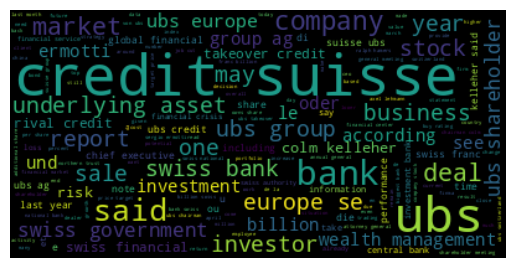

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud on Titles only

In [42]:
data["Title"] = data["Title"].apply(lambda x: remove_numbers(x))
data["Title"] = data["Title"].replace(r'\n'," ", regex=True)
data["Title"] = data["Title"].apply(lambda x: remove_punctuation(x))
data["Title"] = data["Title"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Title"] = data["Title"].apply(lambda x: remove_stopwords(x))
data["Title"] = data["Title"].apply(lambda x: word_lemmatizer(x))

In [43]:
title_text = data["Title"].apply(lambda x: " ".join(x)).str.cat()

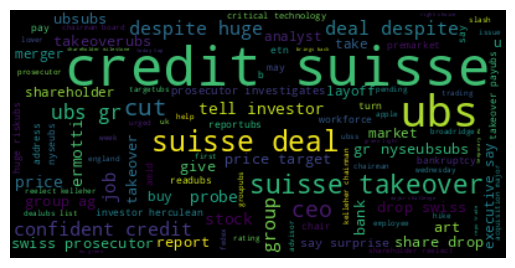

In [44]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(title_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Multithreading Test

In [45]:
from link_extractor import SearchEngines # Might make sense to make Search Engines seperate file for clarity
from link_extractor import Google, Bing, Yahoo
import pandas as pd

In [46]:
%%time
# Calling each browser seperately (single threaded)
google = Google(company="UBS")
google_ubs = google.get_links(max_articles=100)

bing = Bing(company="UBS")
bing_ubs = bing.get_links(max_articles=100)

yahoo = Yahoo(company="UBS")
yahoo_ubs = yahoo.get_links(max_articles=100)

ubs_links = pd.concat([google_ubs, bing_ubs, yahoo_ubs])
ubs_links["Search Engine"].value_counts()

CPU times: user 1.79 s, sys: 158 ms, total: 1.95 s
Wall time: 59.3 s


Google    100
Bing      100
Yahoo     100
Name: Search Engine, dtype: int64

In [47]:
%%time
# 2 Threads for each Search Engine (basically) = 6 total threads

engines = SearchEngines(company="UBS")
ubs = engines.get_links(max_articles=100, threads=6)
ubs["Search Engine"].value_counts()

CPU times: user 1.09 s, sys: 140 ms, total: 1.23 s
Wall time: 21.6 s


Yahoo     100
Google    100
Bing      100
Name: Search Engine, dtype: int64

## More organized Folder structure ? :)

```
search_engines/
│   __init__.py
│
└───engines/
│   │   __init__.py
│   │   google.py
│   │   bing.py
│   │   yahoo.py
│   │   ...
│   
└───utils/
    │   __init__.py
    │   helpers.py
    │   ...
```